In [4]:
import spacy
from spacy import displacy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
import string

In [5]:
nlp=spacy.load('en_core_web_sm')

In [6]:
#convert the csv file to the panda dataframe
data=pd.read_csv('toxic_tweets_dataset.zip',sep=',')
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [6]:
print(data.columns[0])

Unnamed: 0


In [7]:
data=data.drop(data.columns[0],axis=1)
print(data)

       Toxicity                                              tweet
0             0   @user when a father is dysfunctional and is s...
1             0  @user @user thanks for #lyft credit i can't us...
2             0                                bihday your majesty
3             0  #model   i love u take with u all the time in ...
4             0             factsguide: society now    #motivation
...         ...                                                ...
56740         1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741         1  you've gone and broke the wrong heart baby, an...
56742         1  young buck wanna eat!!.. dat nigguh like I ain...
56743         1              youu got wild bitches tellin you lies
56744         0  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[56745 rows x 2 columns]


In [8]:
#add column names to the dataframe
columnName=['toxicity','tweets']
data.columns=columnName
data.head()

,toxicity,tweets
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
print(data.shape)

(56745, 2)


In [10]:
#code to print length of column

print(len(data['tweets']))

56745


In [11]:
print(len(data['toxicity']))

56745


In [9]:
data.isnull().sum()

,0
toxicity,0
tweets,0


In [10]:
import string
punct=string.punctuation
print(punct)
stopwords=nlp.Defaults.stop_words

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
# implementing Bag of Words model with TF-IDF weighting
def datacleaning(sentence):
  doc=nlp(sentence)
  tokens=[]
  for token in doc:
    if token.lemma_!='-PRON-':
      temp=token.lemma_.lower().strip()
    else:
      temp=token.lower_
    tokens.append(temp)

  clean_tokens=[]
  for token in tokens:
    if token not in punct and token not in stopwords:
      clean_tokens.append(token)

  return clean_tokens



In [16]:
datacleaning("the mountain is so high that clouds may touch it!")

['mountain', 'high', 'cloud', 'touch']

In [12]:
#splitting the train and test data
X=data['tweets']
y=data['toxicity']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,y_test.shape)

(45396,) (11349,)


In [13]:
# for the obtained feature apply the svm model and obtain precision,recall,F1 score, confusion matrix, ROC AUC curve
#creating the model and the pipeline
tfidf=TfidfVectorizer(tokenizer=datacleaning)
svm=LinearSVC()
steps=[('tfidf',tfidf),('svm',svm)]
pipe=Pipeline(steps)



In [19]:
#training the model
pipe.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function datacleaning at 0x7d1360d727a0>)),
                ('svm', LinearSVC())])

In [20]:
#testing on the test dataset
y_pred=pipe.predict(X_test)

In [33]:
#printing the classification report and the confusion matrix
print(classification_report(y_test,y_pred))
print("\n\n\n")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6472
           1       0.91      0.91      0.91      4877

    accuracy                           0.93     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.93      0.93      0.93     11349





[[6056  416]
 [ 422 4455]]


ROC AUC: 0.9245972556534758


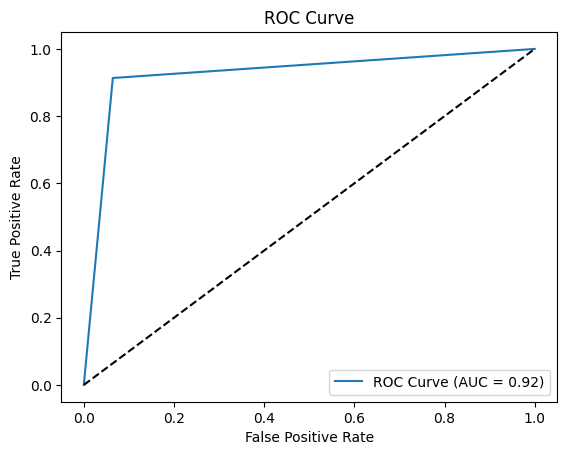

In [34]:
# produce the RoC AUC curve

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




In [35]:
#  Model2: Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

In [38]:
steps = [('tfidf', TfidfVectorizer(tokenizer=datacleaning)), ('dt', dt_classifier)]
dt_pipe = Pipeline(steps)

In [26]:
dt_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function datacleaning at 0x7d1360d727a0>)),
                ('dt', DecisionTreeClassifier())])

In [30]:
# Make predictions
y_pred = dt_pipe.predict(X_test)

In [39]:
# Evaluate the decision tree model
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6472
           1       0.91      0.91      0.91      4877

    accuracy                           0.93     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.93      0.93      0.93     11349


Confusion Matrix:
 [[6056  416]
 [ 422 4455]]


ROC AUC: 0.9245972556534758


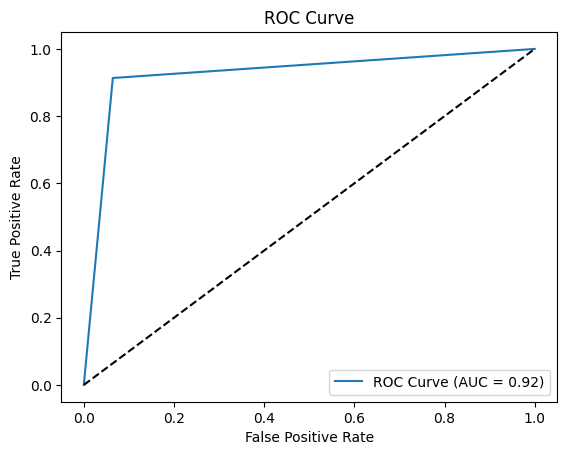

In [40]:
# produce the RoC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Model:3 Random Forest model

from sklearn.ensemble import RandomForestClassifier

In [15]:
# create a random forest classifier
rf_classifier=RandomForestClassifier()


In [16]:
# Create pipelone
steps=[('tfidf',TfidfVectorizer(tokenizer=datacleaning)),('rf',rf_classifier)]
rf_pipe=Pipeline(steps)

In [17]:
# Train the model
rf_pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function datacleaning at 0x7bb5e77d53f0>)),
                ('rf', RandomForestClassifier())])

In [18]:
# Make predictions
y_pred=rf_pipe.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test,y_pred))
print("\nconfusion matriz:\n", confusion_matrix(y_test,y_pred))

ROC AUC: 0.9330940712619159


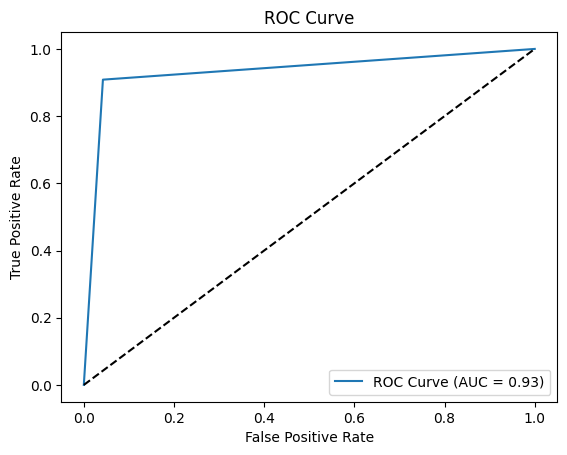

In [20]:
# produce the RoC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
#model 4: K-NN Classifier
from sklearn.neighbors import KNeighborsClassifier


In [22]:
# Create a KNN classifier
knn_classifier=KNeighborsClassifier(n_neighbors=20)


In [23]:
# Create a pipeline
steps=[('tfidf',TfidfVectorizer(tokenizer=datacleaning)),('knn',knn_classifier)]
knn_pipe=Pipeline(steps)


In [24]:
# Train the model
knn_pipe.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function datacleaning at 0x7bb5e77d53f0>)),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

In [ ]:
# Make predictions
y_pred=knn_pipe.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test,y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

ROC AUC: 0.9131430382510662


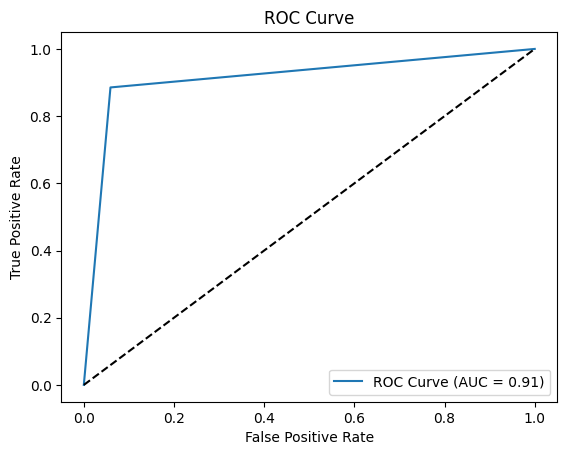

In [36]:
# produce the RoC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Model 5: Naives Bayes Model
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Create a Naive Bayes classifier
nb_classifier=MultinomialNB()

In [ ]:
# Create a pipeline
steps=[('tfidf',TfidfVectorizer(tokenizer=datacleaning)),('nb',nb_classifier)]
nb_pipe=Pipeline(steps)

In [ ]:
# Train the model
nb_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Make predictions
y_pred=nb_pipe.predict(X_test)


In [ ]:
# Evaluate the model
print(classification_report(y_test,y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred))

ROC AUC: 0.9131430382510662


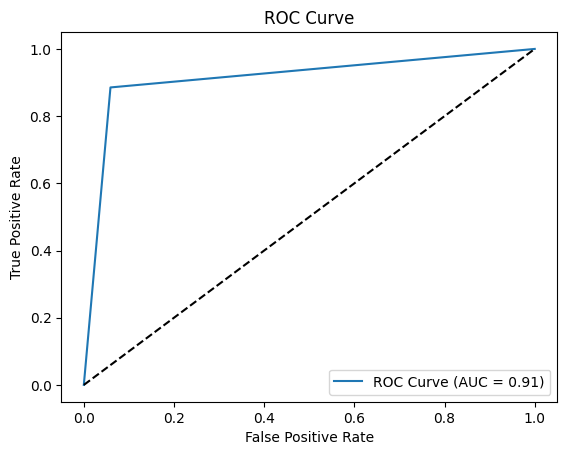

In [35]:
# produce the RoC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()